[*********************100%***********************]  1 of 1 completed


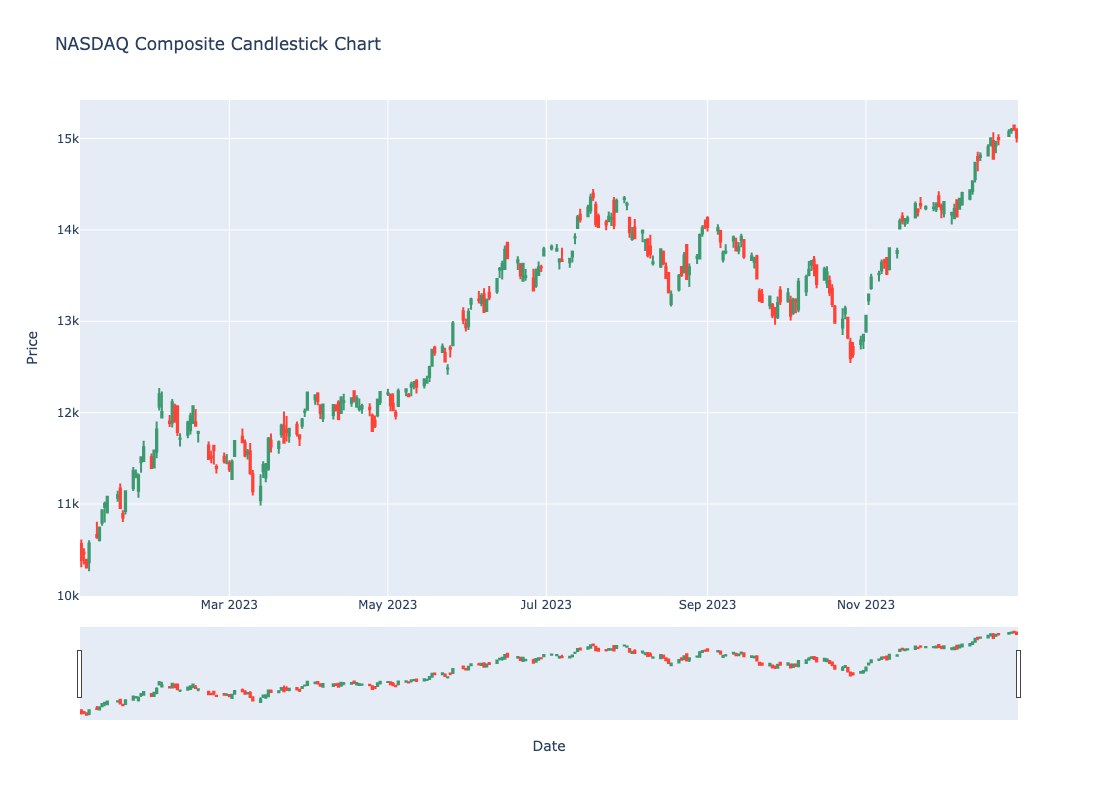

In [13]:
# Import required libraries
import yfinance as yf
import plotly.graph_objects as go

# Define the stock symbol and time range
stock_symbol = "^IXIC"  # NASDAQ Composite
start_date = "2023-01-01"
end_date = "2023-12-31"

# Fetch the stock data
nasdaq_data = yf.download(stock_symbol, start=start_date, end=end_date)

# Reset the index to make 'Date' a column
nasdaq_data.reset_index(inplace=True)

# Clean column names by removing unnecessary headers
nasdaq_data.columns = ['Date', 'Close', 'High', 'Low', 'Open', 'Volume']

# Convert columns to the correct data types
nasdaq_data['Date'] = pd.to_datetime(nasdaq_data['Date'])
nasdaq_data['Close'] = pd.to_numeric(nasdaq_data['Close'], errors='coerce')
nasdaq_data['High'] = pd.to_numeric(nasdaq_data['High'], errors='coerce')
nasdaq_data['Low'] = pd.to_numeric(nasdaq_data['Low'], errors='coerce')
nasdaq_data['Open'] = pd.to_numeric(nasdaq_data['Open'], errors='coerce')
nasdaq_data['Volume'] = pd.to_numeric(nasdaq_data['Volume'], errors='coerce')

# Drop rows with NaN values (if any)
nasdaq_data = nasdaq_data.dropna()

# Create the candlestick chart
fig = go.Figure(data=[go.Candlestick(
    x=nasdaq_data['Date'],
    open=nasdaq_data['Open'],
    high=nasdaq_data['High'],
    low=nasdaq_data['Low'],
    close=nasdaq_data['Close']
)])

# Customize the chart layout to increase height
fig.update_layout(
    title='NASDAQ Composite Candlestick Chart',
    xaxis_title='Date',
    yaxis_title='Price',
    xaxis_rangeslider_visible=True,
    height=800  # Set the height of the chart in pixels
)

# Display the chart
fig.show()